Import `Resources/haunted_places.csv` into a database named `nw-project-3` and a collection named `haunted-places` and then run the code below

In [19]:
# Imports
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [20]:
# Create instance of MongoClient
client = MongoClient(port=27017)

# List databases
print(client.list_database_names())

['admin', 'config', 'local', 'nw_project_3', 'uk_food']


In [21]:
# assign nw-project-3 database to db and list the collection names
db = client['nw_project_3']
print(db.list_collection_names())

['haunted_places']


In [22]:
# print out an entry from haunted-places
pprint(db['haunted_places'].find_one())

{'_id': ObjectId('65307a1164b05a0388495e4e'),
 'city': 'Ada',
 'city_latitude': 42.960727,
 'city_longitude': -85.4954803,
 'country': 'United States',
 'description': 'Ada witch - Sometimes you can see a misty blue figure '
                'floating within a 3-mile radius of the Ada Cemetery on 2 Mile '
                'between Egypt Valley and Honey Creek. The story of her origin '
                'is as follows: A man suspected his wife of having an affair, '
                'so he followed her late one night when she thought he was '
                'asleep. Sure enough, she went to a field near their property '
                'where she met her lover. The husband was enraged and killed '
                'his wife, which resulted in a struggle with the other man. '
                'Both men died from their injuries. It is said that late at '
                'night (especially during the night of and the nights '
                'preceding a full moon) people driving by the field c

In [23]:
cursor = db['haunted_places'].find()
data_list = list(cursor)

# Create a DataFrame from the list of dictionaries
haunted_main = pd.DataFrame(data_list)

haunted_main.head(5)

,_id,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,65307a1164b05a0388495e4e,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,65307a1164b05a0388495e4f,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,65307a1164b05a0388495e50,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,65307a1164b05a0388495e51,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,65307a1164b05a0388495e52,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097


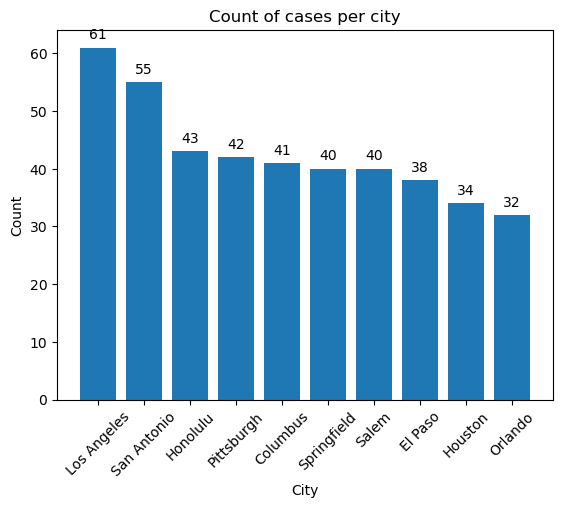

In [24]:
 #10  most 'haunted' cities
haunted_cities = haunted_main['city'].value_counts().head(10)
plt.bar(haunted_cities.index, haunted_cities.values)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count of cases per city')
plt.xticks(rotation=45)

for i, count in enumerate(haunted_cities.values):
    plt.text(i, count +1, str(count), ha='center', va='bottom')
plt.show()

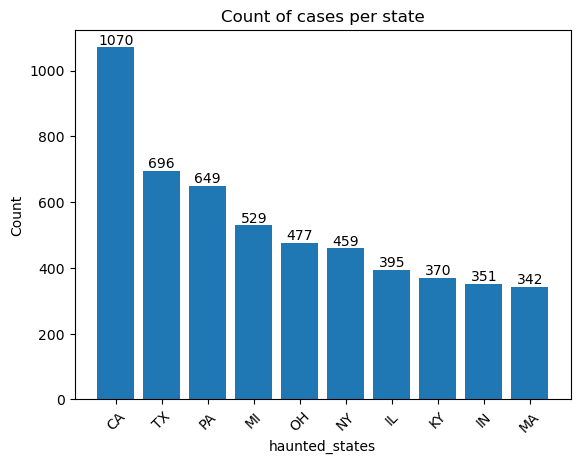

In [25]:
haunted_states = haunted_main['state_abbrev'].value_counts().head(10) 
plt.bar(haunted_states.index, haunted_states.values)
plt.xlabel('haunted_states')
plt.ylabel('Count')
plt.title('Count of cases per state')
plt.xticks(rotation=45)

for i, count in enumerate(haunted_states.values):
    plt.text(i, count +1, str(count), ha='center', va='bottom')
plt.show()

In [26]:
#haunted_main = haunted_main.drop(7924)


In [27]:
haunted_main['place'] = haunted_main['location'].str.extract(r'([a-zA-Z]+)\s*$')

# Replace 'inn' with 'hotel' in the 'place' column
haunted_main['place'] = haunted_main['place'].str.replace('inn', 'hotel', case=False)
haunted_main.head ()

,_id,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,place
0,65307a1164b05a0388495e4e,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727,Cemetery
1,65307a1164b05a0388495e4f,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434,NaN
2,65307a1164b05a0388495e50,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547,Trestle
3,65307a1164b05a0388495e51,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547,University
4,65307a1164b05a0388495e52,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097,College


haunted_main['place']=haunted_main['location'].str.split().str[-1]
haunted_main['place'] = haunted_main['place'].apply(lambda word: re.sub(r'[^a-zA-Z]', '', word) if pd.notnull(word) else '') #Removing non-letter characters from the last position using regular expression
haunted_main['place'] = haunted_main['place'].str.replace('inn', 'hotel')
haunted_main.head()

In [28]:
print(haunted_main['place'])

0           Cemetery
1                NaN
2            Trestle
3         University
4            College
            ...     
10987           hall
10988           Fire
10989    Institution
10990         School
10991         Forest
Name: place, Length: 10992, dtype: object


In [29]:
place_counts = haunted_main['place'].value_counts()
place_counts. head (30)

School        921
Cemetery      620
House         367
College       324
University    315
Road          302
hotel         247
Park          246
Hotel         210
Bridge        182
Hospital      165
Church        130
Center        130
Mansion       121
school        118
Theater        96
Restaurant     90
Hall           87
Theatre        87
Hill           83
Building       80
cemetery       77
Museum         76
Elementary     75
Street         66
Home           66
Lake           60
Library        58
Club           53
house          49
Name: place, dtype: int64

In [30]:
merge_dict = {
    'school': 'Schools',
    'School': 'Schools',
    'High': 'Schools',
    'university': 'Schools',
    'University': 'Schools',
    'college': 'Schools',
    'College': 'Schools',
    'Elementary': 'Schools',  
    'elementary': 'Schools',
    'Academy': 'Schools',
    'Cementeries': 'Cementeries',
    'cemetery': 'Cementeries',  
    'Cemetery': 'Cementeries', 
    'Graveyard': 'Cementeries',
    'House': 'Houses',
    'Apartments': 'Houses',
    'home': 'Houses',
    'Mansion': 'Houses',
    'Home': 'Houses',
    'house':'Houses',
    'Road': 'Roads',
    'road': 'Roads',
    'Street':'Roads',
    'Rd': 'Roads',
    'hotel':'Hotels',
    'Hotel':'Hotels',
}
haunted_main['place_merge'] = haunted_main['place'].replace(merge_dict)


In [31]:
place_counts_2 = haunted_main['place_merge'].value_counts()
place_counts_2.head (50)

Schools        1854
Cementeries     736
Houses          653
Hotels          457
Roads           451
Park            246
Bridge          182
Hospital        165
Center          130
Church          130
Theater          96
Restaurant       90
Hall             87
Theatre          87
Hill             83
Building         80
Museum           76
Lake             60
Library          58
Club             53
Auditorium       39
bridge           39
Plantation       35
s                35
County           35
Tavern           34
Creek            34
Mountain         32
Castle           31
Station          30
Tracks           29
River            29
Woods            29
Hollow           28
Mall             27
Mill             27
park             26
Lodge            26
Asylum           26
Island           23
Base             23
Manor            23
building         23
Place            22
Store            22
Breakfast        22
county           21
Beach            21
tracks           21
Prison           21


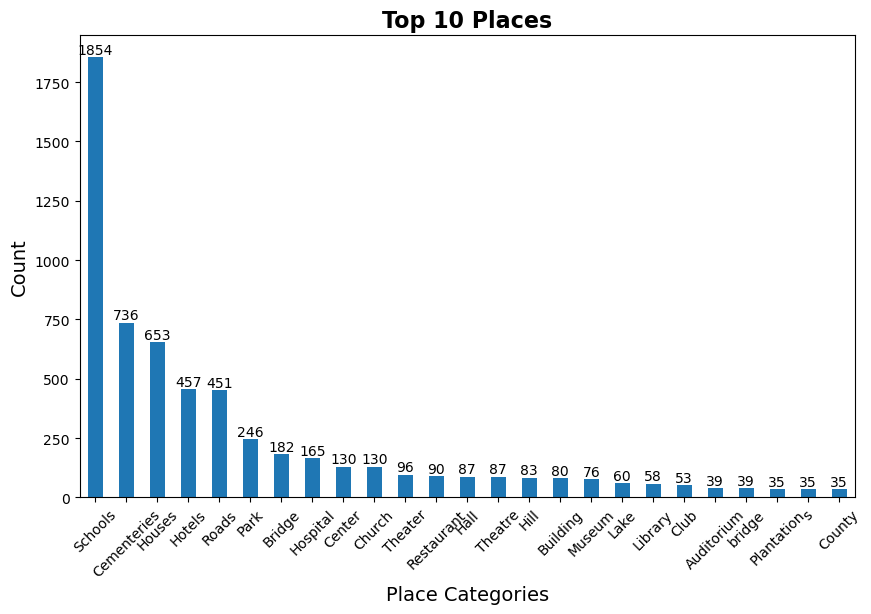

In [32]:
top_10_places = place_counts_2.head(25)

top_10_places.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Places', fontsize=16, weight='bold')
plt.xlabel('Place Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  
#plt.show()

for i, count in enumerate(top_10_places.values):
    plt.text(i, count +1, str(count), ha='center', va='bottom')
plt.show()

In [80]:
keywords = ['witch','shadows', 'old guy','old man', 'light','lights','fire', 'fires', 'shadow','little girl','lady','footsteps','steps', 'sounds','sound', 'fire','on its own','by themselves','ghost','ghosts']  

# Function let's see
def find_key(description):
    for keyword in keywords:
        if keyword in description.lower(): 
            return keyword
    return ('other')

# function
haunted_main['type'] = haunted_main['description'].apply(find_key)


print (haunted_main.head (3))

                        _id     city        country  \
0  65275829fa10580601927e54      Ada  United States   
1  65275829fa10580601927e55  Addison  United States   
2  65275829fa10580601927e56   Adrian  United States   

                                         description         location  \
0  Ada witch - Sometimes you can see a misty blue...     Ada Cemetery   
1  A little girl was killed suddenly while waitin...  North Adams Rd.   
2  If you take Gorman Rd. west towards Sand Creek...    Ghost Trestle   

      state state_abbrev  longitude   latitude  city_longitude  city_latitude  \
0  Michigan           MI -85.504893  42.962106      -85.495480      42.960727   
1  Michigan           MI -84.381843  41.971425      -84.347168      41.986434   
2  Michigan           MI -84.035656  41.904538      -84.037166      41.897547   

      place  place_merge   type  
0  Cemetery  Cementeries  witch  
1       NaN          NaN  light  
2   Trestle      Trestle  light  


In [44]:
type_counts = haunted_main['type'].value_counts()
type_counts. head (10)

type
other          4578
light          1882
ghost          1562
footsteps       480
lady            356
fire            327
sounds          309
little girl     283
shadows         278
shadow          212
Name: count, dtype: int64

keywords = {'witch', 'old guy', 'lady', 'light','lights', 'shadow','little girl','footsteps','steps', 'sounds','sound', 'fire','on its own'}

def find_key(description):
    for keyword in keywords:
        if keyword in description.title(): 
            return keyword
    return ('other')

haunted_main['keyword'] = haunted_main['description'].apply(find_key)

print (haunted_main.head (5))

type_counts = haunted_main['keyword'].value_counts()
type_counts. head (30)

In [45]:
merge_dict2 = {
    'light': 'Lights',
    'lights': 'Lights',
    'footsteps': 'Footsteps',
    'steps': 'Footsteps',
    'sounds': 'Sounds',
    'sound': 'Sounds',
    'shadows': 'Shadows',
    'shadow': 'Shadows',  
    'old man': 'Old man',
    'old guy': 'Old man',
    'by themselves': 'Objets moving',
    'on its own': 'Objets moving',  
    
}
haunted_main['type'] = haunted_main['type'].replace(merge_dict2)

In [46]:
type_counts = haunted_main['type'].value_counts()
type_counts. head (10)

type
other          4578
Lights         1882
ghost          1562
Footsteps       575
Shadows         490
Sounds          439
lady            356
fire            327
little girl     283
witch           180
Name: count, dtype: int64

In [20]:
haunted_main.head ()

,_id,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,place,place_merge,type
0,65275829fa10580601927e54,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727,Cemetery,Cementeries,witch
1,65275829fa10580601927e55,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434,NaN,NaN,Lights
2,65275829fa10580601927e56,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547,Trestle,Trestle,Lights
3,65275829fa10580601927e57,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547,University,Schools,Lights
4,65275829fa10580601927e58,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097,College,Schools,other


In [48]:
grouped = haunted_main.groupby(['type', 'state_abbrev'])

#count
group_sizes = grouped.size()


group_sizes.head (10)

type       state_abbrev
Footsteps  AK               3
           AL              11
           AR               8
           AZ               4
           CA              46
           CO               9
           CT               6
           DC               1
           FL              14
           GA              22
dtype: int64

In [49]:
group_sizes_df = group_sizes.reset_index(name='count')

print(group_sizes_df)

          type state_abbrev  count
0    Footsteps           AK      3
1    Footsteps           AL     11
2    Footsteps           AR      8
3    Footsteps           AZ      4
4    Footsteps           CA     46
..         ...          ...    ...
552      witch           TN      3
553      witch           TX     12
554      witch           VA      4
555      witch           WI      4
556      witch           WV      4

[557 rows x 3 columns]


In [72]:
# Sort by count 
sorted_group_sizes_df = group_sizes_df.sort_values(by='count', ascending=False)
#top 3
top_3_counts_by_type = (
    sorted_group_sizes_df
    .groupby('type')
    .head(3)
)
#erase  'other'
top_3_counts_by_type = top_3_counts_by_type[top_3_counts_by_type['type'] != 'other']

top_3_counts_by_type.head ()

,type,state_abbrev,count
330,ghost,CA,176
53,Lights,CA,176
91,Lights,TX,127
86,Lights,PA,110
364,ghost,PA,109


In [69]:
#only the top3
sorted_group_sizes_df = group_sizes_df.sort_values(by=['type', 'count'], ascending=[True, False])


top_3_counts_by_type = (
    sorted_group_sizes_df
    .groupby('type')
    .head(3)
)

print(top_3_counts_by_type)



              type state_abbrev  count
4        Footsteps           CA     46
41       Footsteps           TX     43
36       Footsteps           PA     28
53          Lights           CA    176
91          Lights           TX    127
86          Lights           PA    110
103  Objets moving           CA     21
133  Objets moving           TX     11
102  Objets moving           AZ      8
142        Old man           CA     15
160        Old man           MO     12
158        Old man           MI     11
186        Shadows           CA     45
222        Shadows           TX     45
217        Shadows           PA     28
234         Sounds           CA     38
269         Sounds           TX     23
246         Sounds           KY     20
313           fire           PA     25
281           fire           CA     24
298           fire           MI     19
330          ghost           CA    176
364          ghost           PA    109
369          ghost           TX     94
381           lady       

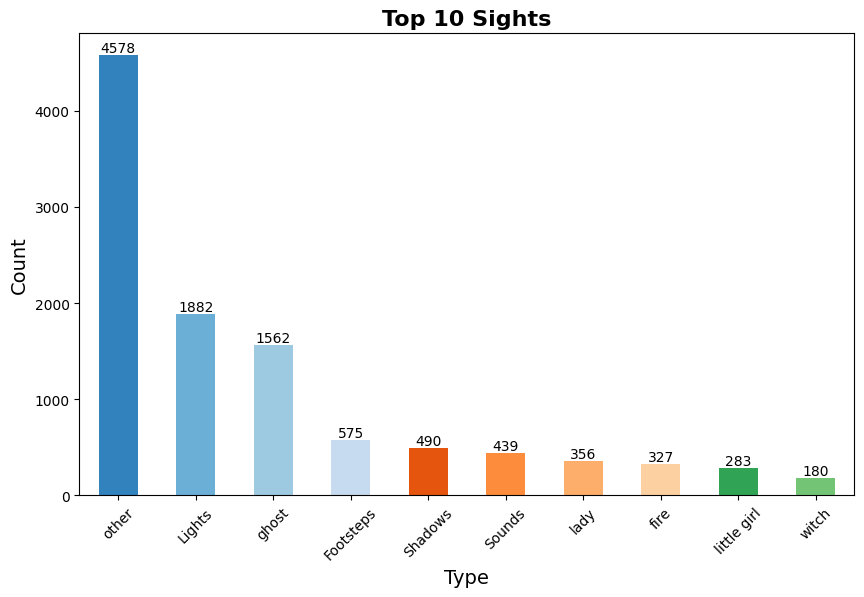

In [81]:
top_10_things = type_counts.head(10)

top_10_things.plot(kind='bar', figsize=(10, 6), color=sns.color_palette('tab20c'))
plt.title('Top 10 Sights', fontsize=16, weight='bold')
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  
#plt.show()

for i, count in enumerate(top_10_things.values):
    plt.text(i, count +1, str(count), ha='center', va='bottom')
plt.show()

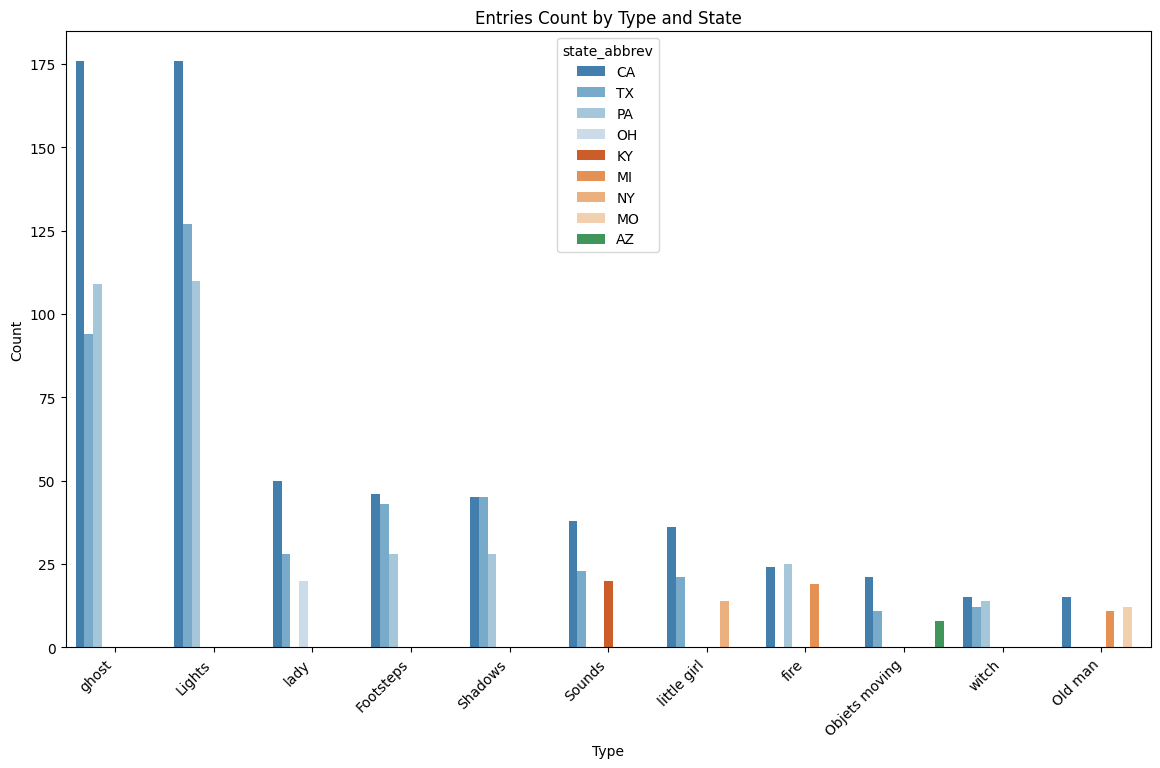

In [74]:
top_3_counts_by_type
plt.figure(figsize=(14, 8))


sns.barplot(x='type', y='count', hue='state_abbrev', data=top_3_counts_by_type, palette='tab20c')


plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Entries Count by Type and State')


plt.xticks(rotation=45, ha='right')


#plt.tight_layout()
plt.show()

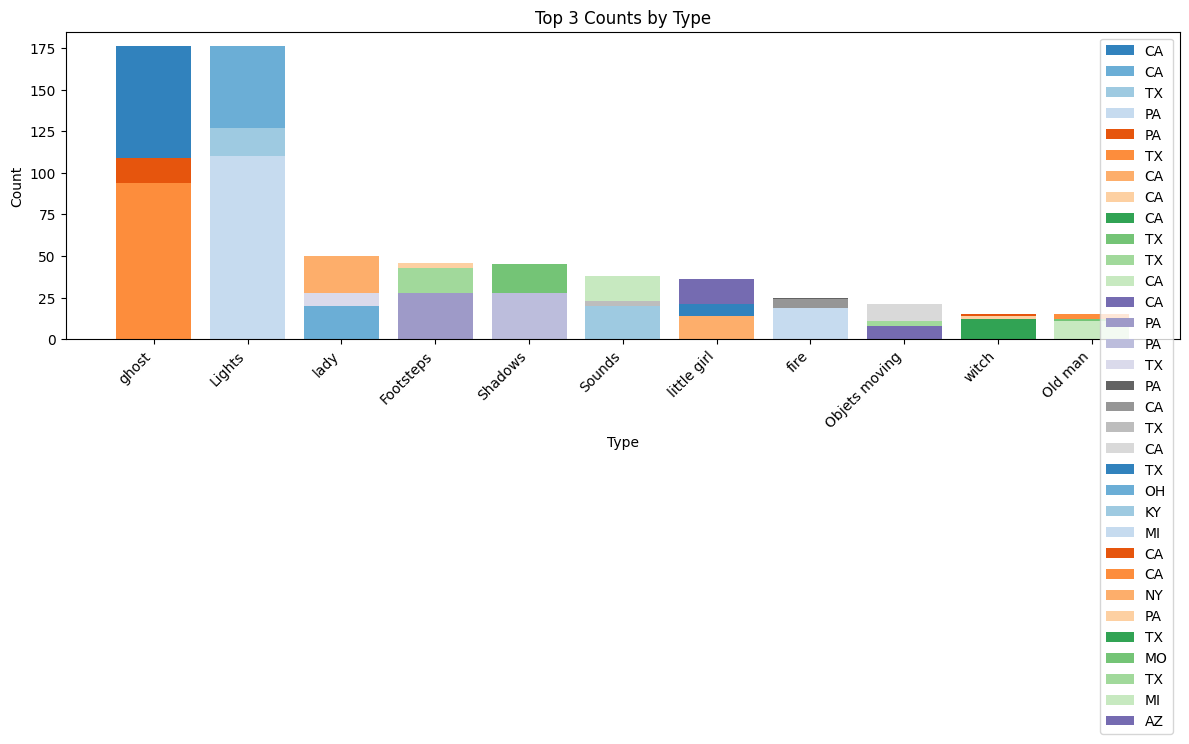

In [75]:
plt.figure(figsize=(12, 6))


plt.bar(top_3_counts_by_type['type'],top_3_counts_by_type['count'], color=sns.color_palette('tab20c'),label=top_3_counts_by_type['state_abbrev'])


plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Top 3 Counts by Type')

plt.xticks(rotation=45, ha='right')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [83]:
def plot_top_3_counts_by_type(top_3_counts_by_type):
    # Define figure and plot properties
    figsize = (14, 8)
    plot_title = 'Entries Count by Type and State'
    xlabel = 'Type'
    ylabel = 'Count'
    xtick_rotation = 45
    ha = 'right'
    
    # Create the figure and apply plot properties
    plt.figure(figsize=figsize)
    plt.title(plot_title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    
    sns.barplot(x='type', y='count', hue='state_abbrev', data=top_3_counts_by_type, palette='tab20c')
    
   
    plt.xticks(rotation=xtick_rotation, ha=ha)
    
    
    plt.show()

In [84]:
import plotly.graph_objs as go

def plot_top_3_counts_by_type(top_3_counts_by_type):
    # Create the plot
    trace = go.Bar(
        x = top_3_counts_by_type['type'],
        y = top_3_counts_by_type['count'],
        marker=dict(color=top_3_counts_by_type['state_abbrev']),
        text = top_3_counts_by_type['count'].apply(lambda x: '{:.2f}'.format(x)),
        textposition = 'auto',
    )
    layout = go.Layout(
        title = 'Entries Count by Type and State',
        xaxis = dict(title = 'Type'),
        yaxis = dict(title = 'Count'),
        barmode='group',
    )
    data = [trace]

    # Include interactivity
    data[0]['hoverinfo'] = 'text'

    # Show the plot
    fig = go.Figure(data=data, layout=layout)
    fig.show()